<a href="https://colab.research.google.com/github/karthikavarmar/InflANNet/blob/main/Complete_model_CTL_X6_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Pre-requisites (Installation)

In [ ]:
!pip install --upgrade pip

     |████████████████████████████████| 1.5MB 8.9MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [ ]:
!pip install tensorflow

In [ ]:
!pip install tf-nightly

     |████████████████████████████████| 322.7 MB 1.4 kB/s 
     |████████████████████████████████| 6.8 MB 58.7 MB/s 
     |████████████████████████████████| 459 kB 49.1 MB/s 


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.3.0


In [ ]:
from google.colab import drive
drive.mount('/gdrive/')

Mounted at /gdrive/


In [ ]:
print ('Files in Drive:')
!ls "/gdrive/My Drive/joint1c.csv"

Files in Drive:
'/gdrive/My Drive/joint1c.csv'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
vacand = pd.read_csv('/gdrive/My Drive/joint1c.csv',sep = ',', skipinitialspace=True)

In [ ]:
vacand = pd.read_csv ('/gdrive/My Drive/joint1c.csv', sep='\s*,\s*', skipinitialspace=True, engine='python')

In [ ]:
vacand

,Unnamed: 0,PEPTIDE,BIN AFF,IMMUNOGENICITY,pI,INSTABILITY,ALIPHATIC,GRAVY,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,...,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179
0,0,AAEQSVVSV,0.3158,-0.26812,4.00,79.11,118.89,0.844,VC,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,AAGQSGVSV,0.4408,-0.29658,5.57,57.71,86.67,0.678,VC,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,AARQSVVSV,0.6794,-0.28382,9.79,79.11,118.89,0.733,VC,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,AEPIRNTNF,0.2857,0.20361,6.05,1.17,54.44,-0.911,VC,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,AILAATVTL,0.6388,0.16793,5.57,20.86,195.56,2.256,VC,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1195,YVCSGLVGD,0.0106,-0.10677,3.80,-0.54,107.78,0.922,NVC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1196,1196,YVELIRGRE,0.0158,0.25850,6.14,-0.54,118.89,-0.578,NVC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1197,1197,YVELIRGRP,0.0541,0.25850,8.75,20.86,118.89,-0.367,NVC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1198,1198,YVSCDPGKC,0.0491,-0.19419,5.82,57.08,32.22,-0.256,NVC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn import preprocessing

lb_encoder = preprocessing.LabelEncoder()

vacand['CATEGORY']= lb_encoder.fit_transform(vacand['CATEGORY'])

In [ ]:
vacand = vacand.drop('PEPTIDE',axis = 1)
vacand

,Unnamed: 0,BIN AFF,IMMUNOGENICITY,pI,INSTABILITY,ALIPHATIC,GRAVY,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,...,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179
0,0,0.3158,-0.26812,4.00,79.11,118.89,0.844,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0.4408,-0.29658,5.57,57.71,86.67,0.678,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,0.6794,-0.28382,9.79,79.11,118.89,0.733,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,0.2857,0.20361,6.05,1.17,54.44,-0.911,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0.6388,0.16793,5.57,20.86,195.56,2.256,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1195,0.0106,-0.10677,3.80,-0.54,107.78,0.922,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1196,1196,0.0158,0.25850,6.14,-0.54,118.89,-0.578,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1197,1197,0.0541,0.25850,8.75,20.86,118.89,-0.367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1198,1198,0.0491,-0.19419,5.82,57.08,32.22,-0.256,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
vacand['CATEGORY'].unique()

array([1, 0])

In [ ]:
target_column = ['CATEGORY'] 
predictors = list(set(list(vacand.columns))-set(target_column))
vacand[predictors] = vacand[predictors]/vacand[predictors].max()
vacand.describe()

,Unnamed: 0,BIN AFF,IMMUNOGENICITY,pI,INSTABILITY,ALIPHATIC,GRAVY,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,...,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,0.500000,0.254399,0.008286,0.533132,0.133225,0.304820,-0.072737,0.531667,0.026667,0.030833,0.043333,0.057500,0.035833,0.105833,0.01750,0.108333,0.054167,0.041667,0.026667,0.046667,0.028333,0.026667,0.064167,0.090833,0.062500,0.070000,0.032500,0.030000,0.035833,0.026667,0.034167,0.050000,0.015000,0.085000,0.011667,0.093333,0.02500,0.046667,0.031667,0.048333,...,0.047500,0.031667,0.040000,0.041667,0.042500,0.105833,0.024167,0.083333,0.035000,0.057500,0.015000,0.060833,0.039167,0.026667,0.041667,0.136667,0.060000,0.060833,0.020833,0.029167,0.024167,0.027500,0.030000,0.034167,0.068333,0.059167,0.014167,0.090833,0.061667,0.079167,0.025833,0.050000,0.025833,0.018333,0.042500,0.103333,0.039167,0.065000,0.061667,0.079167
std,0.289036,0.240413,0.374884,0.189335,0.185429,0.203031,0.376561,0.499204,0.161174,0.172938,0.203691,0.232893,0.185952,0.307752,0.13118,0.310931,0.226441,0.199910,0.161174,0.211012,0.165993,0.161174,0.245152,0.287492,0.242162,0.255253,0.177398,0.170658,0.185952,0.161174,0.181733,0.218036,0.121603,0.278998,0.107425,0.291020,0.15619,0.211012,0.175184,0.214559,...,0.212794,0.175184,0.196041,0.199910,0.201811,0.307752,0.153630,0.276501,0.183856,0.232893,0.121603,0.239124,0.194072,0.161174,0.199910,0.343638,0.237586,0.239124,0.142886,0.168344,0.153630,0.163603,0.170658,0.181733,0.252422,0.236035,0.118227,0.287492,0.240649,0.270111,0.158704,0.218036,0.158704,0.134210,0.201811,0.304521,0.194072,0.246629,0.240649,0.270111
min,0.000000,0.001009,-1.111853,0.284526,-0.257712,0.000000,-2.243547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.027694,-0.261032,0.375208,0.001698,0.166654,-0.335457,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [ ]:
X = vacand[predictors].values
Y = vacand[target_column].values

In [ ]:
X = pd.DataFrame(vacand[predictors].values)
Y = pd.DataFrame(vacand[target_column].values)

In [ ]:
X,Y

(      0    1    2    3    4    5    6    ...       180  181  182  183  184  185  186
 0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.354076  0.0  0.0  0.0  0.0  0.0  0.0
 1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.494226  0.0  0.0  0.0  0.0  0.0  0.0
 2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.761745  0.0  0.0  0.0  0.0  0.0  0.0
 3     0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.320327  0.0  0.0  0.0  0.0  0.0  0.0
 4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.716224  0.0  0.0  0.0  0.0  0.0  0.0
 ...   ...  ...  ...  ...  ...  ...  ...  ...       ...  ...  ...  ...  ...  ...  ...
 1195  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.011885  0.0  0.0  0.0  0.0  0.0  0.0
 1196  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.017715  0.0  0.0  0.0  0.0  0.0  0.0
 1197  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.060657  1.0  0.0  0.0  0.0  0.0  0.0
 1198  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.055051  0.0  0.0  0.0  0.0  0.0  0.0
 1199  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.06603

In [ ]:
X.shape, Y.shape

((1200, 187), (1200, 1))

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)

X_train, X_val, Y_train, Y_val  = train_test_split(X_train, Y_train, test_size=0.25, random_state=20)

In [ ]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_val = to_categorical(Y_val)

In [ ]:
count_classes = Y_test.shape[1]
print(count_classes)

2


In [ ]:
count_classes = Y_val.shape[1]
print(count_classes)

2


In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train.min(), X_train.max()

(0.0, 1.0000000000000002)

###Model building

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential 
from keras.layers import Dense,Dropout

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf

#model = Sequential()

model = tf.keras.Sequential()

# Adds a densely-connected layer with 64 units to the model:
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.5))

# Add another:
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dropout(0.5))

# Add a softmax layer with 10 output units:
model.add(layers.Dense(2,  activation='sigmoid'))

##Adam

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['BinaryAccuracy'])

Train set - Accuracy & Loss


In [ ]:
# build the model
history1 = model.fit(X_train, Y_train, epochs=80,validation_data=(X_val, Y_val),verbose = 0)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                1880      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
_________________________________________________________________
dropout_1 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 8         
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('\nhistory1 dict:', history1.history)


history1 dict: {'loss': [0.693726658821106, 0.6633694767951965, 0.537028431892395, 0.46341225504875183, 0.40781787037849426, 0.35888469219207764, 0.3060540556907654, 0.287129282951355, 0.30692338943481445, 0.3036113977432251, 0.2736544609069824, 0.3004133403301239, 0.2860702574253082, 0.27420735359191895, 0.2689576745033264, 0.29483357071876526, 0.2891833782196045, 0.2642448842525482, 0.2848810851573944, 0.285953164100647, 0.2820962965488434, 0.2800867259502411, 0.27770426869392395, 0.25961002707481384, 0.23993146419525146, 0.286271870136261, 0.2915104031562805, 0.260954886674881, 0.268082857131958, 0.2620302736759186, 0.28061914443969727, 0.2793787717819214, 0.2575783431529999, 0.26763591170310974, 0.2613924741744995, 0.2785450220108032, 0.279617577791214, 0.26244544982910156, 0.2608200013637543, 0.26019176840782166, 0.26742294430732727, 0.2735704183578491, 0.25301605463027954, 0.25575268268585205, 0.25204581022262573, 0.27933892607688904, 0.27573874592781067, 0.2753441333770752, 0.2

In [ ]:
#pred_train= model.predict(X_train)
#scores = model.evaluate(X_train, Y_train, verbose=0)
#print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1])) 

pred_train= model.predict(X_val)
scores = model.evaluate(X_val, Y_val, verbose=0)
print('Accuracy on validation data: {}% \n Error on validation data: {}'.format(scores[1], 1 - scores[1])) 
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, Y_test, verbose=0)
print('\n Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

print('\n test loss, test acc:', scores2)

Accuracy on validation data: 0.987500011920929% 
 Error on validation data: 0.012499988079071045

 Accuracy on test data: 0.9958333373069763% 
 Error on test data: 0.004166662693023682

 test loss, test acc: [0.02335020713508129, 0.9958333373069763]


In [ ]:
losses = pd.DataFrame(history1.history)
losses

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.693727,0.527083,0.682718,0.606250
1,0.663369,0.600694,0.580967,0.914583
2,0.537028,0.671528,0.339607,0.950000
3,0.463412,0.686111,0.201900,0.968750
4,0.407818,0.723611,0.121294,0.995833
...,...,...,...,...
75,0.271677,0.844444,0.034682,0.987500
76,0.265604,0.858333,0.034166,0.987500
77,0.247183,0.869444,0.044877,0.987500
78,0.258595,0.855556,0.061977,0.987500


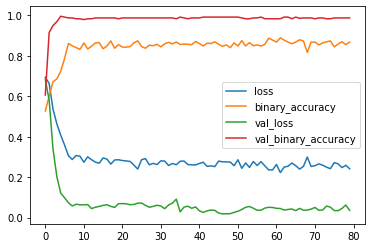

In [ ]:
losses.plot()

In [ ]:
for i in range(0,len(pred_test)):
  for j in range(0,len(pred_test[i])):
    if(pred_test[i,j]<=0.5):
      pred_test[i,j]=0
    else:
      pred_test[i,j]=1


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, pred_test)

0.9958333333333333

In [ ]:
pred_train.shape, pred_test.shape

((240, 2), (240, 2))

In [ ]:
Y_train.shape,Y_test.shape

((720, 2), (240, 2))

In [ ]:
X_train.shape, X_test.shape

((720, 187), (240, 187))

In [ ]:
predictions = pd.DataFrame(model.predict(X_test))
predictions

,0,1
0,4.424188e-16,1.000000
1,7.031716e-06,0.999994
2,1.358306e-18,1.000000
3,9.999745e-01,0.000026
4,8.673031e-13,1.000000
...,...,...
235,9.912195e-01,0.008891
236,5.081723e-06,0.999996
237,9.903616e-01,0.009756
238,4.030147e-11,1.000000


In [ ]:
pred_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [ ]:
model.metrics_names

# list all data in history
print(history1.history.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


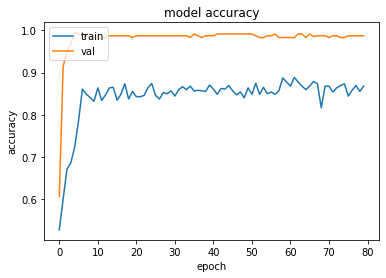

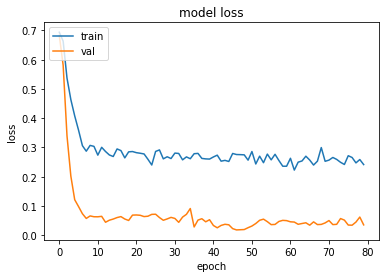

In [ ]:
# summarize history for accuracy
plt.plot(history1.history['binary_accuracy'])
plt.plot(history1.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       114
           1       0.99      1.00      1.00       126

   micro avg       1.00      1.00      1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240
 samples avg       1.00      1.00      1.00       240



In [ ]:
Y_test_new=[]
pred_test_new=[]
for i in Y_test:
  for j in range(0,len(i)):
    if(i[j]==1):
      Y_test_new.append(j)
for i in pred_test:
  for j in range(0,len(i)):
    if(i[j]==1):
      pred_test_new.append(j)

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
confusion_matrix = metrics.confusion_matrix(Y_test_new,pred_test_new)
confusion_matrix

array([[113,   1],
       [  0, 126]])

In [ ]:
#import matplotlib.pyplot as plt 
!pip install scikit-plot

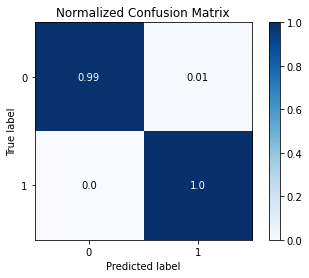

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_test_new,pred_test_new, normalize=True)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_nn,tpr_nn, thresholds = roc_curve(Y_test_new, pred_test_new)
roc_auc_nn = auc(fpr_nn,tpr_nn)
roc_auc_nn


0.9956140350877193

Text(0.5, 0, 'False Positive Rate')

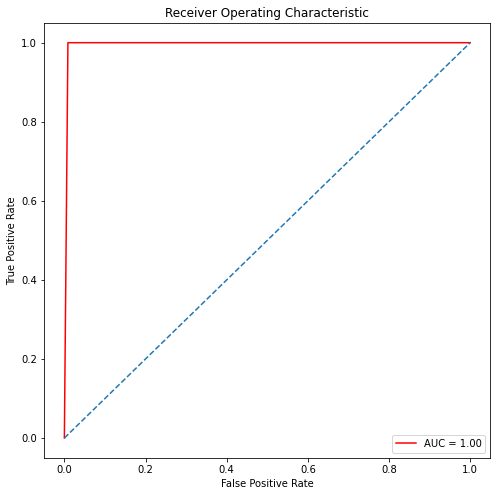

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_nn,tpr_nn, color='red',label = 'AUC = %0.2f' % roc_auc_nn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve

average_precision = average_precision_score(Y_test_new,pred_test_new)

print('Average precision-recall score: {}'.format(average_precision))

Average precision-recall score: 0.9921259842519685


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.99')

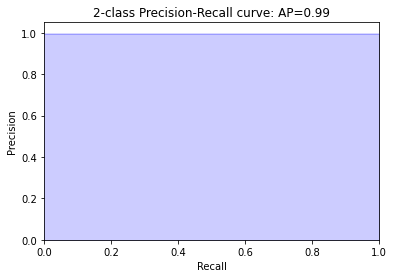

In [ ]:
precision, recall, _ = precision_recall_curve(Y_test_new,pred_test_new)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [ ]:
!mkdir -p saved_model
model.save('saved_mymodel/my_model') 

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_mymodel/my_model/assets


In [ ]:
# my_model directory
!ls saved_mymodel

# Contains an assets folder, saved_mymodel.pb, and variables folder.
!ls saved_mymodel/my_model

my_model
assets	saved_model.pb	variables


In [ ]:
new_model = tf.keras.models.load_model('saved_mymodel/my_model')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                1880      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
_________________________________________________________________
dropout_1 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 8         
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________
